# CONVOLUTIONAL NEURAL NETWORK (CNN's)

CNN
image -> image parts -> convolutional layer -> ReLU -> Pooling layer -> Linear Output Layer 

In [1]:
# create a cnn

In [1]:
import torch
from torch import nn
import torchvision 
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import  matplotlib.pyplot as plt

In [2]:
train_data= datasets.FashionMNIST(
    root="data", #where to download the data
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data= datasets.FashionMNIST(
    root="data", #where to download the data
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [3]:
from torch.utils.data import DataLoader #helps to create batches, very import library
BATCH_SIZE=32
#turn datasets into batches
train_dataloader=DataLoader(dataset=train_data,
                           batch_size=BATCH_SIZE,
                           shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [4]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    
    def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        #block1: conv,relu- conv,relu,maxpool
        #block2: conv,relu- conv,relu,maxpool
        self.conv_block_1= nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2)
        )
        
        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels= hidden_units,
                      kernel_size= 3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features= output_shape)
            
        )
        
    def forward(self,x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x= self.conv_block_2(x)
        #print(x.shape)
        x= self.classifier(x)
        return x
        

In [6]:
class_names= train_data.classes

In [7]:
torch.manual_seed(42)
model_2= FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape= len(class_names))
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [8]:
#nn. Conv2d
torch.manual_seed(42)
#creating a batch of images
images = torch.randn(size=(32,3,64,64))
test_image= images[0]
print('image shape',images.shape)
print('test image shape',test_image.shape)
# print(test_image)

image shape torch.Size([32, 3, 64, 64])
test image shape torch.Size([3, 64, 64])


In [10]:
#create a single conv2d layer
conv_layer= nn.Conv2d(in_channels=3,
                      out_channels=10, # hidden units
                      kernel_size=3,
                      stride=1,
                      padding=0)

#pass the data through the convolutional layer
conv_output = conv_layer(test_image)
# conv_output

In [11]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [12]:
#nn.maxpool2d
print('test image shape', test_image.shape)
print('test image unsqueeze shape', test_image.unsqueeze(dim=1).shape)
torch.manual_seed(42)
# create sample nn.maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass the data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print('shape after going through conv_layer', test_image_through_conv.shape)

#pass the data through the max_pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print('shape after going through conv_layer and max_pool', test_image_through_conv_and_max_pool.shape)


test image shape torch.Size([3, 64, 64])
test image unsqueeze shape torch.Size([3, 1, 64, 64])
shape after going through conv_layer torch.Size([1, 10, 62, 62])
shape after going through conv_layer and max_pool torch.Size([1, 10, 31, 31])


In [13]:
torch.manual_seed(42)
#create random tensor with a similar number of dimensions to our images
random_tensor= torch.randn(size=(1,1,2,2)) #batch size, color channels , height , width

#create max pool layer
max_pool_layer= nn.MaxPool2d(kernel_size=2)
#random tensor through max pool
random_tensor_max_pool= max_pool_layer(random_tensor)
print('random',random_tensor)
print("max pool tensor", random_tensor_max_pool)
print('passing random tensor through maxpool layer', random_tensor_max_pool.shape)
print('shape of random tensor',random_tensor.shape)

random tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
max pool tensor tensor([[[[0.3367]]]])
passing random tensor through maxpool layer torch.Size([1, 1, 1, 1])
shape of random tensor torch.Size([1, 1, 2, 2])


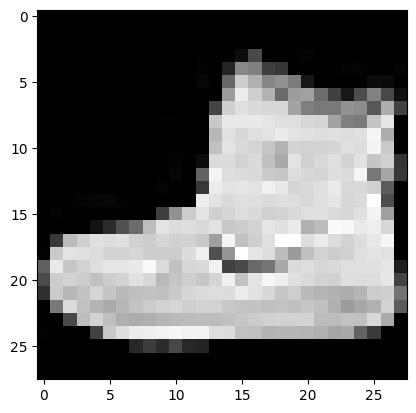

In [14]:
plt.imshow(image.squeeze(), cmap="gray")

In [15]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_2.parameters(),
                          lr=0.1)

In [16]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### training and testinf model2

In [17]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
    train_loss, train_acc = 0,0
    #put model in training mode
    model.train()

    #training

    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader):
        #1 forward pass
        y_pred= model(X)
        
        loss= loss_fn(y_pred,y)
        
        train_loss += loss #accumulate train loss
        train_acc +=accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
        
        optimizer.zero_grad()
        
        #loss backward
        loss.backward()
        
        #optimizer step
        optimizer.step()
        
        #print out whats happening
        if batch %400==0:
            print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
            
    #divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #print out whats happening
    print(f"Train loss: {train_loss:0.5f} | Train_acc: {train_acc: 0.2f}%")

test_loss=0
def testing_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            #forward pass
            test_pred= model(X)
            
            #calculate the loss
            test_loss +=loss_fn(test_pred,y)
            
            #calculate the accuracy
            test_acc +=accuracy_fn(y_true=y, 
                                   y_pred=test_pred.argmax(dim=1))
            
        #calculate the test loss average per batch
        test_loss /= len(data_loader)
        
        #calculate the test acc average per batch
        test_acc /= len(data_loader)
    
    #print out whats happening
    print(f"Test_loss: {test_loss:0.5f} | Test_acc: {test_loss: 0.2f}, Test acc: {test_acc: 4f}")

    

In [18]:
from timeit import default_timer as timer
def print_train_time(start: float,
                    end: float):
    """Prints difference between start and end time """
    total_time= end-start
    return ("train time",total_time)

In [20]:
pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
torch.manual_seed(42)
from tqdm.auto import tqdm

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")
    train_step(model=model_2,
               data_loader= train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn= accuracy_fn)
    
    testing_step(model=model_2,
              data_loader= test_dataloader,
              loss_fn= loss_fn,
              accuracy_fn= accuracy_fn
              )
train_time_end_model_2= timer()
total_train_time_model_2= print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.59606 | Train_acc:  78.36%
Test_loss: 0.39623 | Test_acc:  0.40, Test acc:  85.972444
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.36217 | Train_acc:  86.86%
Test_loss: 0.35979 | Test_acc:  0.36, Test acc:  86.671326
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.32442 | Train_acc:  88.27%
Test_loss: 0.32527 | Test_acc:  0.33, Test acc:  88.168930


In [22]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    """Returns a dictionary containng the results of model predicting on data Loader"""
    loss, acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            #make predictions
            y_pred= model(X)
            
            
            #accumulate the loss and accuracy balues per batch
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true=y,
                              y_pred= y_pred.argmax(dim=1))
            
        #scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name": model.__class__.__name__,
           "model_loss": loss.item(),
           "model_acc": acc}


In [23]:
# get results
model_2_results =  eval_model( model= model_2,
                              data_loader= test_dataloader,
                              loss_fn= loss_fn,
                              accuracy_fn= accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32526591420173645,
 'model_acc': 88.16892971246007}

In [24]:
# make and evaluatate random predictions with bet model


In [25]:
def make_predictions(model: torch.nn.Module,
                     data: list):
    pred_probs=[]
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare the sample
            sample= torch.unsqueeze(sample, dim=0)
            
            #forward pass
            pred_logit = model(sample)
            
            #get prediction probablity
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            
            #get pred probs off the GPU
            pred_probs.append(pred_prob)
    
    # stack the pred_probs to turn a list into a tensor
    return torch.stack(pred_probs)

In [26]:
import random
# random.seed(42)
test_samples= []
test_lables= []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_lables.append(label)
    
    print(test_samples[0].shape)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Dress')

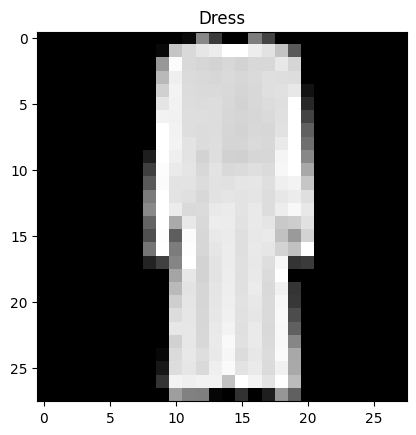

In [27]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_lables[0]])

In [28]:
# make predictions

In [29]:
pred_probs = make_predictions(model= model_2,
                             data= test_samples)
# view first two prediction probablities
pred_probs[:2]

tensor([[1.2285e-02, 3.3592e-02, 4.8763e-03, 8.5020e-01, 9.7984e-02, 3.7683e-06,
         8.3208e-04, 5.2641e-05, 1.6297e-04, 1.5852e-05],
        [2.1962e-02, 1.4132e-03, 2.7785e-04, 9.3535e-01, 3.7665e-04, 3.1963e-06,
         4.0588e-02, 2.5110e-06, 3.0165e-05, 7.6204e-07]])

In [30]:
test_lables

[3, 3, 6, 1, 5, 6, 8, 6, 6]

In [31]:
# convert pred probs to labels
pred_classes= pred_probs.argmax(dim=1)
pred_classes

tensor([3, 3, 4, 1, 5, 6, 8, 6, 6])

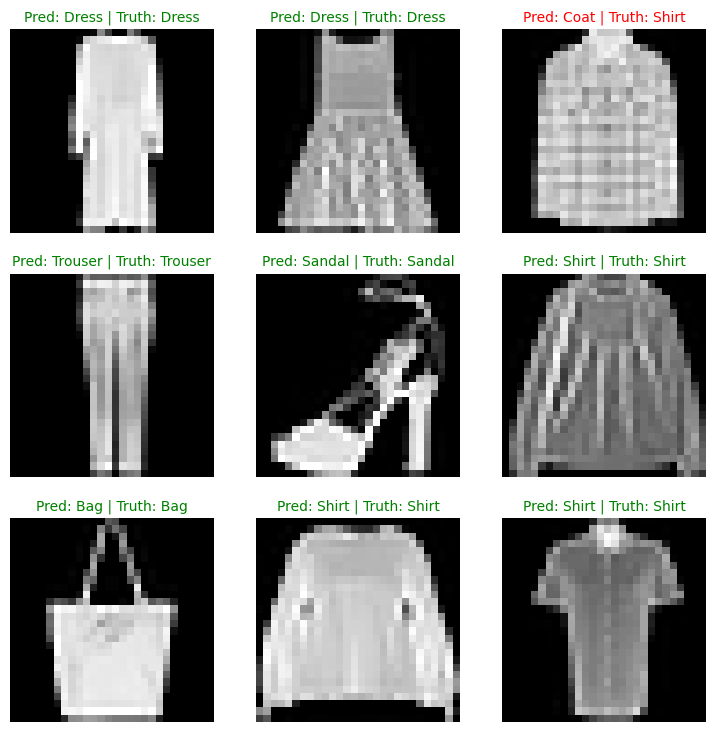

In [32]:
# plot predtions
plt.figure(figsize=(9,9))
nrows= 3
ncols=3
for i , sample in enumerate(test_samples):
    #create subplot
    plt.subplot(nrows,ncols, i+1)
    
    # plot the target image
    plt.imshow(sample.squeeze(), cmap= 'gray')
    
    # find pred label in text form
    pred_label= class_names[pred_classes[i]]
    
    #get truth label 
    truth_label = class_names[test_lables[i]]
    
    #create a title for the plot
    title_text= f"Pred: {pred_label} | Truth: {truth_label}"
    
    
    # check for equality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g') #green if pred is same as truth
    else:
        plt.title(title_text, fontsize=10, c='r')
    
    plt.axis(False);


In [33]:
# confusion matrix

1) make preds with trained model on test dataset

2) make a confusion matrix

3) plt a confusion matrix using mlxtend.plotting.plot_confusion_matrix

In [42]:
pip install mlxtend

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 810.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 628.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 532.4 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 567.2 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [43]:
import mlxtend
mlxtend.__version__

'0.21.0'

In [35]:
# import progress bar
from tqdm.auto import tqdm

# make predictions with trained model
y_preds=[]
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc= "making predictions..."):
        #forward pass
        y_logit= model_2(X)
        # turn predictions from logits to predictions
        y_pred= torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        #put prediction on cpu for evaluation
        y_preds.append(y_pred)

# print(y_preds)
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor[:10]
    





making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [36]:
len(y_pred_tensor)

10000

In [38]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 737.7 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
import torchmetrics
torchmetrics.__version__

'0.10.3'

In [40]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

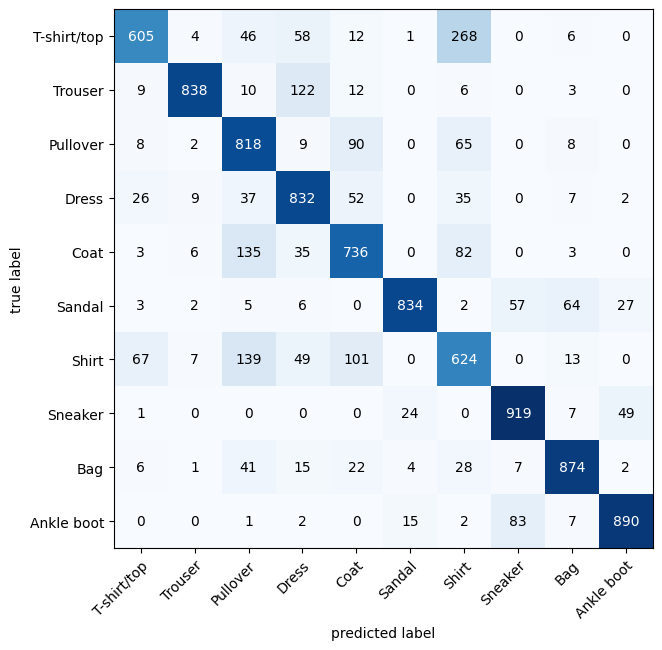

In [44]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes= len(class_names))
confmat_tensor= confmat(preds= y_pred_tensor,
                        target = test_data.targets)

# plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names= class_names,
    figsize=(10,7))

In [45]:
confmat_tensor

tensor([[605,   4,  46,  58,  12,   1, 268,   0,   6,   0],
        [  9, 838,  10, 122,  12,   0,   6,   0,   3,   0],
        [  8,   2, 818,   9,  90,   0,  65,   0,   8,   0],
        [ 26,   9,  37, 832,  52,   0,  35,   0,   7,   2],
        [  3,   6, 135,  35, 736,   0,  82,   0,   3,   0],
        [  3,   2,   5,   6,   0, 834,   2,  57,  64,  27],
        [ 67,   7, 139,  49, 101,   0, 624,   0,  13,   0],
        [  1,   0,   0,   0,   0,  24,   0, 919,   7,  49],
        [  6,   1,  41,  15,  22,   4,  28,   7, 874,   2],
        [  0,   0,   1,   2,   0,  15,   2,  83,   7, 890]])

In [46]:
# saving and loading the model

In [47]:
from pathlib import Path
# create model director path
MODEL_PATH= Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True
                )
#creat model save
MODEL_NAME= "03Ppytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj= model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03Ppytorch_computer_vision_model_2.pth


In [48]:
#create a new instance
torch.manual_seed(42)
loaded_model_2= FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                   output_shape= len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [49]:
#evaluation the loaded model

In [50]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32526591420173645,
 'model_acc': 88.16892971246007}

In [51]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model= loaded_model_2,
                                    data_loader= test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn = accuracy_fn
                                   )
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32526591420173645,
 'model_acc': 88.16892971246007}

In [52]:
print('hello world')

hello world


In [53]:
import numpy as np

In [54]:
import pandas as pd